In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#Files to Load
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

#Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

#Combine the data into a single dataset & display the data table for preview
pyber_df = pd.merge (ride_df, city_df, on="city", how="left")
display(pyber_df.head())

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
pyber_df.columns

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')

In [5]:
#BUBBLE PLOT (Pt. 1)
#Calculate info and create new dataframe to pull x & y variables
city_var = pyber_df.groupby(['city'])
avg_fare = city_var['fare'].mean()
tot_rides = city_var['ride_id'].count()
drivers = city_var['driver_count'].mean()
types = city_df.set_index('city')['type']
variables_df = pd.DataFrame({"Average Fare": avg_fare,
                            "Total Rides": tot_rides,
                            "Drivers": drivers,
                            "City Types": types})
display(variables_df.head())

,Average Fare,Total Rides,Drivers,City Types
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [6]:
variables_df.columns

Index(['Average Fare', 'Total Rides', 'Drivers', 'City Types'], dtype='object')

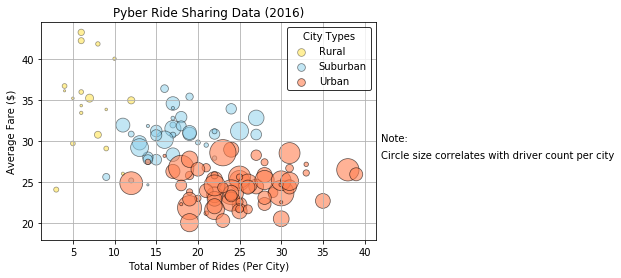

In [7]:
#BUBBLE PLOT (Pt. 2)
# Obtain the x and y coordinates for each of the three city types

#Set types as variables to create x & y coordinates
urban = variables_df[variables_df['City Types'] == 'Urban']
suburban = variables_df[variables_df['City Types'] == 'Suburban']
rural = variables_df[variables_df['City Types'] == 'Rural']

# Build the scatter plots for each city types
#Rural
plt.scatter(rural['Total Rides'], rural['Average Fare'], color="Gold", s=variables_df['Drivers'], marker="o", alpha=0.40, label="Rural", edgecolors="Black", linewidths=0.75)
#Suburban
plt.scatter(suburban['Total Rides'], suburban['Average Fare'], color="Skyblue", s=variables_df['Drivers']*5, marker="o", alpha=0.50, label="Suburban", edgecolors="Black", linewidths=0.75)
#Urban
plt.scatter(urban['Total Rides'], urban['Average Fare'], color="Coral", s=variables_df['Drivers']*10, marker="o", alpha=0.60, label="Urban", edgecolors="Black", linewidths=0.75)


# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()
plt.text(42, 30, "Note:")
plt.text(42, 28, "Circle size correlates with driver count per city")

# Create a legend
legend = plt.legend(title = "City Types", frameon=True, edgecolor='black')
legend.legendHandles[0]._sizes = [60]
legend.legendHandles[1]._sizes = [60]
legend.legendHandles[2]._sizes = [60]

# Save Figure
plt.savefig("../Pyber/CityPlot.png", bbox_inches='tight')

In [8]:
#PIE CHARTS

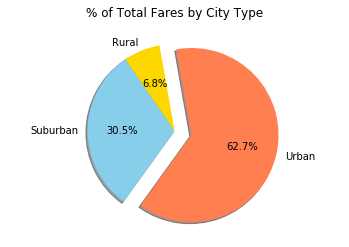

In [9]:
# % OF TOTAL FARES BY CITY TYPE

# Calculate Type Percents
city_fare = pyber_df[['type', 'fare']]
py_fare = city_fare.groupby('type')
total_fare = py_fare['fare'].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = total_fare
colors = ['Gold', 'Skyblue', 'Coral']
explode = (0, 0, 0.2)

plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)

# Save Figure
plt.savefig("../Pyber/FarePlot.png")

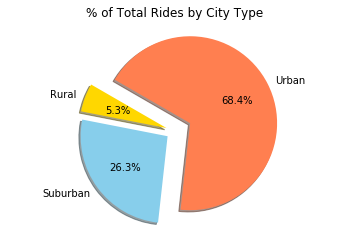

In [10]:
# % OF TOTAL RIDES BY CITY TYPE

# Calculate Type Percents
city_rides = pyber_df[['type', 'ride_id']]
py_rides = city_rides.groupby('type')
total_rides = py_rides['ride_id'].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = total_rides
colors = ['Gold', 'Skyblue', 'Coral']
explode = (0.1, 0.1, 0.2)

plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure
plt.savefig("../Pyber/RidePlot.png")

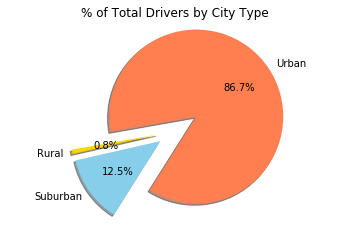

In [11]:
# % OF TOTAL DRIVERS BY CITY TYPE

# Calculate Type Percents
city_drivers = pyber_df[['type', 'driver_count']]
py_drivers = city_drivers.groupby('type')
total_drivers = py_drivers['driver_count'].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = total_drivers
colors = ['Gold', 'Skyblue', 'Coral']
explode = (0.2, 0.2, 0.3)

plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=190)

# Save Figure
plt.savefig("../Pyber/DriverPlot.png")